**The Hunton marketing team recently sent out an email blast focused on a specific set of products (Pacesetter). This notebook imports and cleans the data then analyzes which link within the message recipients clicked. The goal is to better understand how customers interact with our marketing materials and improve our ability to target specific groups.**

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# bring data into df

dfClicks = pd.read_csv(path)
dfClicks = dfClicks[["Job title","Clicked Link Address","Clicked At"]]
pd.set_option("max_rows",None)
dfClicks

,Job title,Clicked Link Address,Clicked At
0,Engineer,http://www.huntonservices.com/contact-us,3/12/2021 8:26am
1,NaN,http://www.huntonservices.com/mechanical-services,3/11/2021 8:55am
2,Executive Management,http://www.huntonservices.com/mechanical-services,3/10/2021 9:56pm
3,NaN,http://www.huntonservices.com/contact-us,3/10/2021 4:51pm
4,Sales,http://www.huntonservices.com/contact-us,3/10/2021 2:38pm
5,Sales,http://www.huntonservices.com/contact-us,3/10/2021 1:50pm
6,Sales,http://www.huntonservices.com/contact-us,3/10/2021 1:23pm
7,NaN,http://www.huntonservices.com/contact-us,3/10/2021 12:59pm
8,Mechanical Contractor,http://www.huntonservices.com/contact-us,3/10/2021 12:58pm
9,Executive Management,http://www.huntonservices.com/contact-us,3/10/2021 10:23am


Seems like we have some decent information here. Let's clean up "Clicked Link Address" so it's easier to group and understand the data. There's extra info we don't need (Ex: "http://www") that needs to be removed. Additionally, the info we want from each link is in a different location for each site - it needs to be parsed out of the strings.

In [7]:
dfClicks["Trim Link"] = dfClicks["Clicked Link Address"].apply(lambda x: "HS Home Page" if "http://www.huntonservices.com/" == x else "HS "+x.replace("http://www.huntonservices.com/","").title() if "http://www.hunton" in x else x[8:15].title() if "twitter" in x else x.split(".")[1].title() )

In [8]:
dfClicks

,Job title,Clicked Link Address,Clicked At,Trim Link
0,Engineer,http://www.huntonservices.com/contact-us,3/12/2021 8:26am,HS Contact-Us
1,NaN,http://www.huntonservices.com/mechanical-services,3/11/2021 8:55am,HS Mechanical-Services
2,Executive Management,http://www.huntonservices.com/mechanical-services,3/10/2021 9:56pm,HS Mechanical-Services
3,NaN,http://www.huntonservices.com/contact-us,3/10/2021 4:51pm,HS Contact-Us
4,Sales,http://www.huntonservices.com/contact-us,3/10/2021 2:38pm,HS Contact-Us
5,Sales,http://www.huntonservices.com/contact-us,3/10/2021 1:50pm,HS Contact-Us
6,Sales,http://www.huntonservices.com/contact-us,3/10/2021 1:23pm,HS Contact-Us
7,NaN,http://www.huntonservices.com/contact-us,3/10/2021 12:59pm,HS Contact-Us
8,Mechanical Contractor,http://www.huntonservices.com/contact-us,3/10/2021 12:58pm,HS Contact-Us
9,Executive Management,http://www.huntonservices.com/contact-us,3/10/2021 10:23am,HS Contact-Us


Much better. Now it's easy to see where each customer clicked. Next step is to group by destination link and sort.

In [9]:
dfLinks = dfClicks.groupby("Trim Link").count()
dfLinks = dfLinks.sort_values(by="Clicked Link Address",ascending=False)
dfLinks.reset_index(inplace=True)
dfLinks = dfLinks[["Trim Link","Clicked Link Address"]]
dfLinks.rename(columns={"Clicked Link Address":"Clicks","Trim Link":"Link"},inplace=True)
dfLinks

,Link,Clicks
0,HS Contact-Us,45
1,HS Mechanical-Services,25
2,HS Indoor-Environmental-Solutions,23
3,Constantcontact,22
4,Google,20
5,HS Engineered-Fabricated-Products,20
6,HS Energy-Services,19
7,HS Home Page,18
8,Linkedin,16
9,Facebook,15


Now we have some potentially actionable data. It seems like customers generally click on the Hunton sites, possibly to get more information about the products. It's also possible some customers were looking to unsubscribe based on the high rate of clicks on "Contact Us" and "Constantcontact", but unsub info from marketing shows this isn't really the case - unsubscribes from this email blast were relatively low.

Now to visualize the results to help non-technical users understand the data at hand.

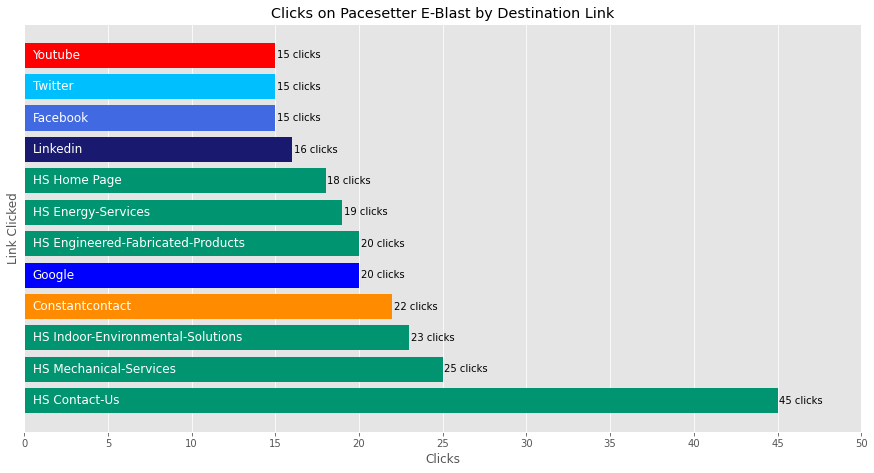

In [10]:
plt.figure(figsize=(15,7.5))
plt.style.use("ggplot")

barcolors = ["#009570","#009570","#009570","darkorange","blue","#009570","#009570",
             "#009570","midnightblue","royalblue","deepskyblue","red"]

plt.barh(y="Link",width="Clicks",data=dfLinks,color=barcolors)
plt.title("Clicks on Pacesetter E-Blast by Destination Link")
plt.xlabel("Clicks")
plt.ylabel("Link Clicked")
plt.yticks([])
plt.xticks(np.arange(0,55,5))
plt.xlim(0,50)
for y, x in zip(dfLinks["Link"],dfLinks["Clicks"]):
    plt.text(x=.5,y=y,s=y,c="w",va="center",fontsize="large") # label bars so Y tick labels aren't needed (too long)
    plt.text(x=x+.1,y=y,s=f"{x} clicks",va="center") # label bars with click counts

plt.show()

There we go, an easy to understand chart. From here, marketing can focus on changes to the layout or content of email blasts to drive the kind of behavior they want to see from customers. For example, we know social media engagement leads to more inbound sales calls from customers who were on the email list as well as others who weren't. From this chart, it's easy to tell social media is not grabbing customers' attention the way we want it to. Perhaps the marketing team could make minor changes to the way those links are presented to increase the click rate.

I'd also like to look at how each position group interacted with the links in the email blast. This information will help to better target decision makers in our customer base. Ex: if we know recipients in leadership positions frequently click certain links, we can predict how they'll react to new marketing materials. This can guide our marketing strategy in the future.

We'll have to do some cleaning in the "Job title" column and create position groups for the known job titles.

In [11]:
# replace null values in dfClicks["Job title"] with "Unknown"

dfClicks["Job title"] = dfClicks["Job title"].apply(lambda x: "Unknown" if pd.isnull(x) else x)
dfClicks.head()

,Job title,Clicked Link Address,Clicked At,Trim Link
0,Engineer,http://www.huntonservices.com/contact-us,3/12/2021 8:26am,HS Contact-Us
1,Unknown,http://www.huntonservices.com/mechanical-services,3/11/2021 8:55am,HS Mechanical-Services
2,Executive Management,http://www.huntonservices.com/mechanical-services,3/10/2021 9:56pm,HS Mechanical-Services
3,Unknown,http://www.huntonservices.com/contact-us,3/10/2021 4:51pm,HS Contact-Us
4,Sales,http://www.huntonservices.com/contact-us,3/10/2021 2:38pm,HS Contact-Us


In [12]:
# aggregate by position type

positions = dfClicks["Job title"].unique() # keys to be found in dfClicks
poscats = ["Engineering","Unknown","Leadership","Sales","Mech Con","Unknown","Management","Mech Con","Management",
          "Leadership","Leadership","Management","Management","Management","Management"] # values to match key order

posdict = dict(zip(positions,poscats))

In [18]:
# create position type column in dfClicks by mapping the {posdict} ("Job title" => keys)

dfClicks["Job Type"] = dfClicks["Job title"].map(posdict)

In [17]:
# create separate grouped df for job type clicks

dfTypes = dfClicks.groupby(["Trim Link","Job Type"]).count()
dfTypes.reset_index(inplace=True)
dfTypes = dfTypes[["Trim Link","Job Type","Job title"]]
dfTypes.rename(columns={"Trim Link":"Link","Job title":"Clicks"},inplace=True)
dfTypes

,Link,Job Type,Clicks
0,Constantcontact,Leadership,3
1,Constantcontact,Management,6
2,Constantcontact,Unknown,13
3,Facebook,Leadership,3
4,Facebook,Management,4
5,Facebook,Unknown,8
6,Google,Leadership,3
7,Google,Management,5
8,Google,Unknown,12
9,HS Contact-Us,Engineering,1


In [19]:
dfTypes1 = dfTypes.pivot(index="Link",columns="Job Type",values="Clicks")

dfTypes1.reset_index(inplace=True)
dfTypes1.set_index("Link",drop=True,inplace=True)
dfTypes1

Job Type,Engineering,Leadership,Management,Mech Con,Sales,Unknown
Link,,,,,,
Constantcontact,NaN,3.0,6.0,NaN,NaN,13.0
Facebook,NaN,3.0,4.0,NaN,NaN,8.0
Google,NaN,3.0,5.0,NaN,NaN,12.0
HS Contact-Us,1.0,4.0,8.0,2.0,3.0,27.0
HS Energy-Services,NaN,3.0,5.0,NaN,NaN,11.0
HS Engineered-Fabricated-Products,NaN,3.0,6.0,NaN,NaN,11.0
HS Home Page,NaN,3.0,6.0,NaN,NaN,9.0
HS Indoor-Environmental-Solutions,1.0,3.0,6.0,NaN,1.0,12.0
HS Mechanical-Services,NaN,4.0,8.0,NaN,NaN,13.0


Ok great. Now we have a simple table with a row for each destination link, columns for each job type "bucket", and cells with the number of times each job type clicked each link. As helpful as this is, it'd be easier for non-technical users to have a visualization to help them understand the data.

I'm not entirely sure what the best method will be here so I'm going to try a few different versions and see what best communicates the message.

<Figure size 1440x720 with 0 Axes>

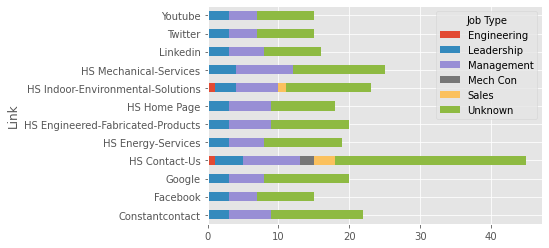

In [20]:
# stacked bar chart based on job type and link clicks

plt.figure(figsize=(20,10))
dfTypes1.plot.barh(stacked=True)

plt.show()

The stacked bar chart is ok, but it's really tough to label bar segments so the user has to do some work to see how each clink/group is represented.

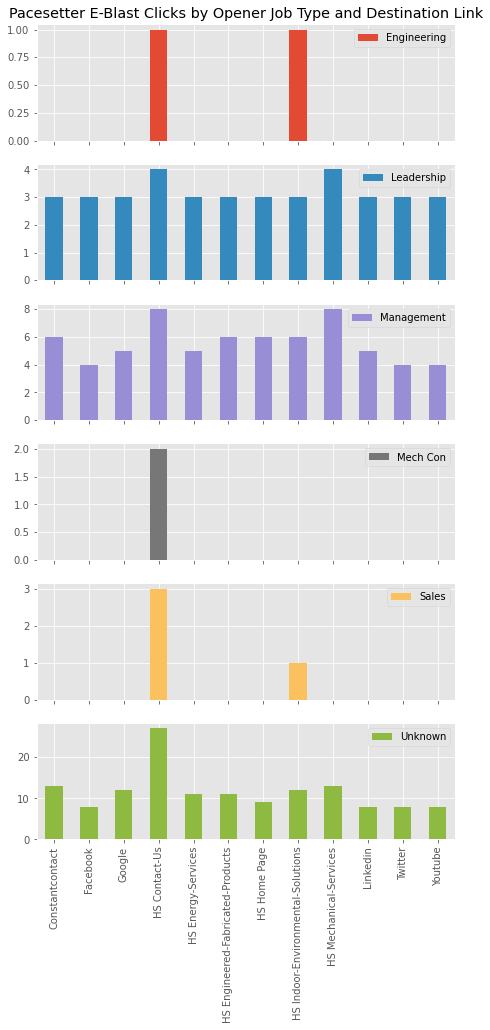

In [21]:
# let's try a panel chart instead

axs = dfTypes1.plot(kind="bar",subplots=True,sharex=True,figsize=(7.5,15),
                    legend=True,width=.5,
                    title=["Pacesetter E-Blast Clicks by Opener Job Type and Destination Link","","","","",""])
plt.xlabel(None)

plt.show()

Again, this is pretty good, even an improvement as each job type has its own subplot. But this format makes for a large image that won't really fit on a printed page. On top of that, the chart only really works if the x tick labels are only on the bottom subplot - this means users have to constantly go back and forth between the plot they're looking at and the bottom plot to see which bar represents each link.

In [22]:
# Last methond will be in-line bars within the dataframe itself.

for col in dfTypes1.columns.values:
    dfTypes1[col] = dfTypes1[col].apply(lambda x: 0 if pd.isnull(x) else x)
dfTypes1[["Engineering","Leadership","Management","Mech Con","Sales","Unknown"]] = dfTypes1[["Engineering","Leadership","Management","Mech Con","Sales","Unknown"]].astype(int)

dfTypes1.style \
    .bar(align="mid",color="#009570") \
    .set_caption("Clicks by Opener Type and Link") \
    .set_properties(border="2px solid white")

Job Type,Engineering,Leadership,Management,Mech Con,Sales,Unknown
Link,,,,,,
Constantcontact,0,3,6,0,0,13
Facebook,0,3,4,0,0,8
Google,0,3,5,0,0,12
HS Contact-Us,1,4,8,2,3,27
HS Energy-Services,0,3,5,0,0,11
HS Engineered-Fabricated-Products,0,3,6,0,0,11
HS Home Page,0,3,6,0,0,9
HS Indoor-Environmental-Solutions,1,3,6,0,1,12
HS Mechanical-Services,0,4,8,0,0,13


Aha! I think this is the one. While it can still take a little interpretation from the user, it's generally simple to see where each group clicked. Sharing a dataframe is not as easy as a .pdf, but the simple solution is to use the Windows snip tool (or Mac targeted screenshot) to clip this graphic out and share with end users.

**To potentially expand on this project, I think the best course of action would be to get better information on the job titles for our email recipients. As evidenced by the graphical dataframe above, most users fall into the "Unknown" category which does very little to help us understand who responds to our marketing campaigns. One potential solution would be to scrape data from LinkedIn for the recipients of email blast, but that comes with its own set of issues.**

**This notebook was created using actual data from the Hunton marketing team. I analyzed and visualized the data for the team and shared the insights with them to help guide future decision-making regarding marketing material within email blasts. These visualizations were shared with leadership and will be part of how our teams look at data moving forward.**